<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4:  Using Yelp cost estimates for estimating neighborhood affluency

<i>
                
                Submitted by Shannon Bingham and Roy Kim
</i>

 
## Problem Statement
This tool will estimate the affluence of a neighborhood based on the number of `$` of businesses and services (according to Yelp) in a given neighborhood. (`$`, `$$`, `$$$`, `$$$$`) This tool will expect to get, as an input, a list of zip codes or names of neighborhoods and will estimate the wealth of the locality. While traditional methods typically estimate wealth of a locality based on demographic characteristics (e.g. income or unemployment rate), the novelty of this approach is in its use of big data related to commercial activity and cost of product and services as an indicator for affluency.

## Notebook Description
_This notebook will be used for some basic feature engineering, in which we added density features (number of businesses per sq. mile and number of businesses per person), average dollar sign per zipcode, and average rating per zipcode, to name a few._

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../data/yelp_and_city_data.csv')

In [4]:
df.head()

,zipcode,population,cost_of_living,area,median_income,n_business,n_coffee,n_costco,n_d1,n_d2,...,n_s1plus,n_s2,n_s2plus,n_s3,n_s3plus,n_s4,n_s4plus,n_s5,n_starbucks,n_wholefoods
0,53018,8065.0,101.2,11.5,96683.0,506.0,51.0,0.0,179.0,173.0,...,13.0,22.0,40.0,83.0,83.0,121.0,73.0,312.0,6.0,0.0
1,53022,19509.0,100.0,27.9,81688.0,159.0,12.0,0.0,46.0,63.0,...,3.0,18.0,17.0,35.0,35.0,40.0,12.0,107.0,4.0,0.0
2,53034,1769.0,88.9,8.3,59674.0,94.0,7.0,0.0,26.0,24.0,...,0.0,2.0,5.0,12.0,12.0,23.0,17.0,54.0,0.0,0.0
3,53038,4299.0,82.8,30.2,74924.0,161.0,13.0,0.0,55.0,50.0,...,5.0,12.0,14.0,22.0,22.0,34.0,28.0,99.0,1.0,0.0
4,53045,21522.0,102.0,14.4,100149.0,575.0,50.0,0.0,211.0,222.0,...,19.0,31.0,70.0,134.0,134.0,121.0,51.0,403.0,14.0,0.0


In [5]:
df['avg_d'] = (df['n_d1']*1 + df['n_d2']*2 + df['n_d3']*3 + df['n_d4']*4)/df['n_business']

In [6]:
df.head()

,zipcode,population,cost_of_living,area,median_income,n_business,n_coffee,n_costco,n_d1,n_d2,...,n_s2,n_s2plus,n_s3,n_s3plus,n_s4,n_s4plus,n_s5,n_starbucks,n_wholefoods,avg_d
0,53018,8065.0,101.2,11.5,96683.0,506.0,51.0,0.0,179.0,173.0,...,22.0,40.0,83.0,83.0,121.0,73.0,312.0,6.0,0.0,2.229249
1,53022,19509.0,100.0,27.9,81688.0,159.0,12.0,0.0,46.0,63.0,...,18.0,17.0,35.0,35.0,40.0,12.0,107.0,4.0,0.0,2.320755
2,53034,1769.0,88.9,8.3,59674.0,94.0,7.0,0.0,26.0,24.0,...,2.0,5.0,12.0,12.0,23.0,17.0,54.0,0.0,0.0,2.648936
3,53038,4299.0,82.8,30.2,74924.0,161.0,13.0,0.0,55.0,50.0,...,12.0,14.0,22.0,22.0,34.0,28.0,99.0,1.0,0.0,2.354037
4,53045,21522.0,102.0,14.4,100149.0,575.0,50.0,0.0,211.0,222.0,...,31.0,70.0,134.0,134.0,121.0,51.0,403.0,14.0,0.0,2.106087


In [7]:
df['density_bus_area'] = df['n_business']/df['area']

In [8]:
df['density_bus_pop'] = df['n_business']/df['population']

In [9]:
df['avg_s'] = (df['n_s1']*1 + df['n_s1plus']*1.5 + 
               df['n_s2']*2 + df['n_s2plus']*2.5 + 
               df['n_s3']*3 + df['n_s3plus']*3.5 + 
               df['n_s4']*4 + df['n_s4plus']*4.5 + 
               df['n_s5']*5)/(df['n_s1'] + df['n_s1plus'] + 
               df['n_s2'] + df['n_s2plus'] + df['n_s3'] + df['n_s3plus'] + 
               df['n_s4'] + df['n_s4plus'] + df['n_s5'])

In [10]:
df['rev_to_bus'] = df['n_review']/df['n_business']

In [11]:
df.head()

,zipcode,population,cost_of_living,area,median_income,n_business,n_coffee,n_costco,n_d1,n_d2,...,n_s4,n_s4plus,n_s5,n_starbucks,n_wholefoods,avg_d,density_bus_area,density_bus_pop,avg_s,rev_to_bus
0,53018,8065.0,101.2,11.5,96683.0,506.0,51.0,0.0,179.0,173.0,...,121.0,73.0,312.0,6.0,0.0,2.229249,44.000000,0.062740,4.051769,21.986166
1,53022,19509.0,100.0,27.9,81688.0,159.0,12.0,0.0,46.0,63.0,...,40.0,12.0,107.0,4.0,0.0,2.320755,5.698925,0.008150,3.968165,23.006289
2,53034,1769.0,88.9,8.3,59674.0,94.0,7.0,0.0,26.0,24.0,...,23.0,17.0,54.0,0.0,0.0,2.648936,11.325301,0.053137,4.114504,6.957447
3,53038,4299.0,82.8,30.2,74924.0,161.0,13.0,0.0,55.0,50.0,...,34.0,28.0,99.0,1.0,0.0,2.354037,5.331126,0.037451,3.922000,12.627329
4,53045,21522.0,102.0,14.4,100149.0,575.0,50.0,0.0,211.0,222.0,...,121.0,51.0,403.0,14.0,0.0,2.106087,39.930556,0.026717,3.967280,33.488696


In [12]:
# The n_costco and n_wholefoods columns don't have any data in them, 
# so I'll be dropping them
df = df.drop(['n_costco','n_wholefoods'], axis=1)

In [13]:
# Saving the engineered data to be further used in analysis.
df.to_csv('../data/engineered_data.csv',index=False)

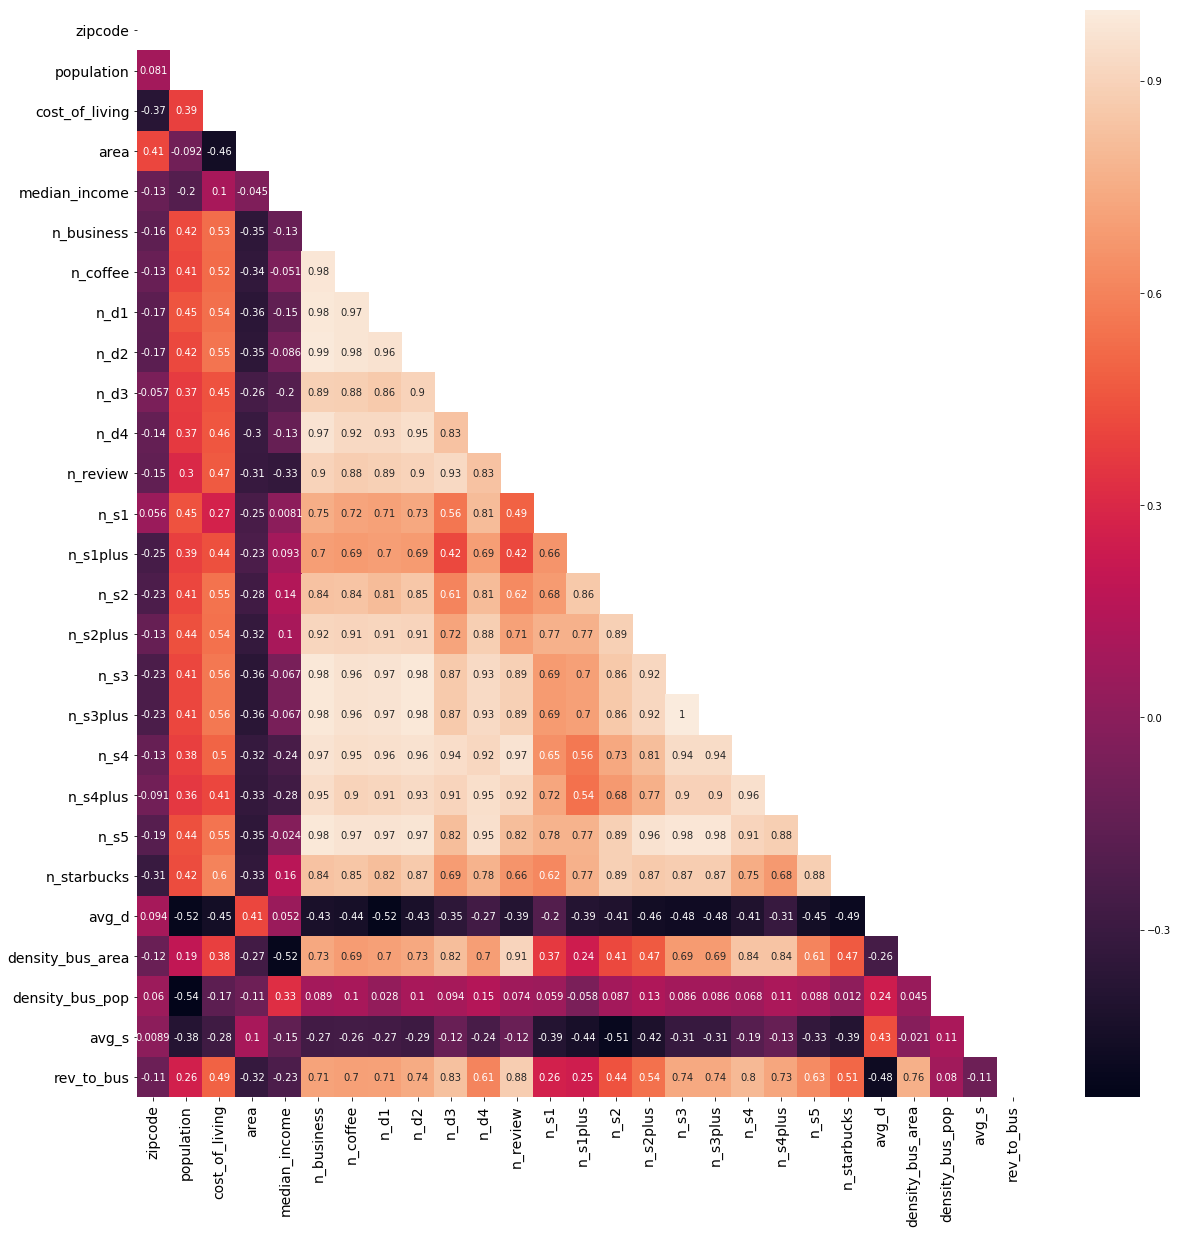

In [19]:
# Generate a heatmap in seaborn.
# Set the default matplotlib figure size to 12x12:
fix, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df.corr(), mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()